In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
torch.__version__

'2.0.1+cu118'

preparing and loading data


In [ ]:
#splitting of train and test set
x=torch.arange(0,1,0.02)

In [ ]:
y=0.7*x+0.3

In [ ]:
train_split=int(0.8*len(x))
train_split

40

In [ ]:
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

In [ ]:
len(x_train),len(x_test)

(40, 10)

visualising the data

In [ ]:
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c="b",s=4, label='training data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    plt.legend(prop={"size":14});

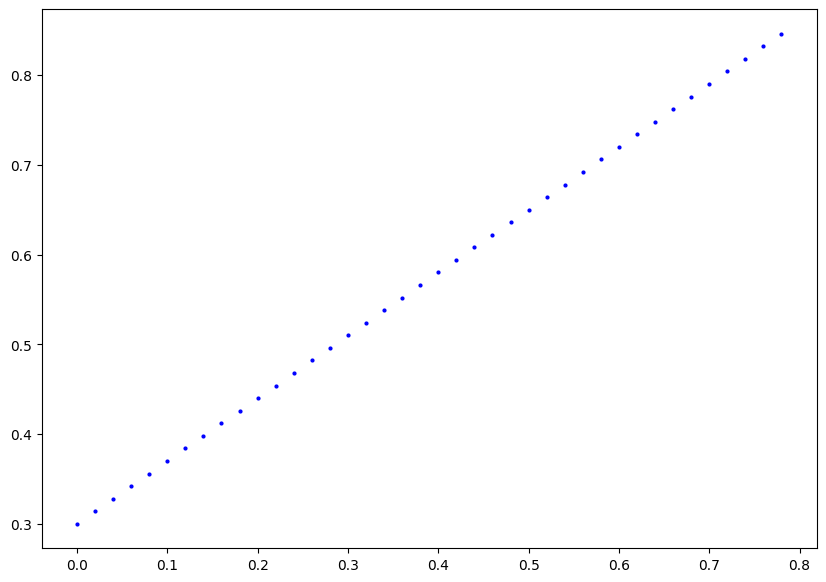

In [ ]:
plot_prediction();

Building a model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))




  def forward(self,x):
    return self.weights*x+self.bias



In [ ]:
torch.manual_seed(42)

model_0=LinearRegressionModel()
model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():
  y_preds=model_0(x_test)

y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

In [ ]:
y_test

tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
        0.9860])

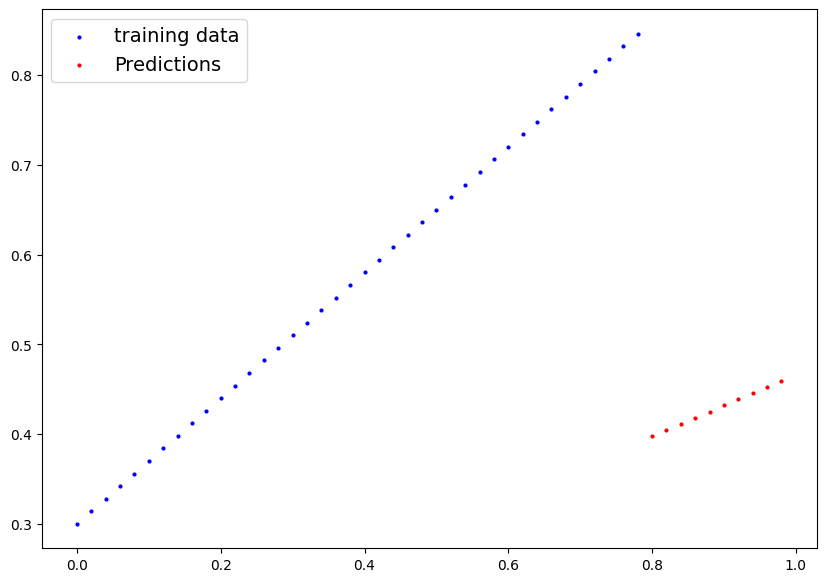

In [ ]:
plot_prediction(predictions=y_preds)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)



In [ ]:
epochs=100


#tracking the model

epoch_count=[]
loss_value=[]
test_loss_value=[]




for epoch  in range(epochs):   #pass the data thorough the model a no. of times
  model_0.train()

  y_pred=model_0(x_train)
  loss=loss_fn(y_pred,y_train)
  print(loss)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()   # take a step to optimise the parameters to min. the loss


  #testing the model

  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(x_test)

    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f"epoch :{epoch} | loss :{loss} | test loss:{test_loss}")

tensor(0.3129, grad_fn=<MeanBackward0>)
epoch :0 | loss :0.31288138031959534 | test loss:0.48106518387794495
tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.2898, grad_fn=<MeanBackward0>)
tensor(0.2783, grad_fn=<MeanBackward0>)
tensor(0.2668, grad_fn=<MeanBackward0>)
tensor(0.2553, grad_fn=<MeanBackward0>)
tensor(0.2438, grad_fn=<MeanBackward0>)
tensor(0.2322, grad_fn=<MeanBackward0>)
tensor(0.2207, grad_fn=<MeanBackward0>)
tensor(0.2092, grad_fn=<MeanBackward0>)
tensor(0.1977, grad_fn=<MeanBackward0>)
epoch :10 | loss :0.1976713240146637 | test loss:0.3463551998138428
tensor(0.1862, grad_fn=<MeanBackward0>)
tensor(0.1746, grad_fn=<MeanBackward0>)
tensor(0.1631, grad_fn=<MeanBackward0>)
tensor(0.1516, grad_fn=<MeanBackward0>)
tensor(0.1401, grad_fn=<MeanBackward0>)
tensor(0.1285, grad_fn=<MeanBackward0>)
tensor(0.1170, grad_fn=<MeanBackward0>)
tensor(0.1061, grad_fn=<MeanBackward0>)
tensor(0.0968, grad_fn=<MeanBackward0>)
tensor(0.0891, grad_fn=<MeanBackward0>)
epoch :20 | loss :0.089

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(x_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

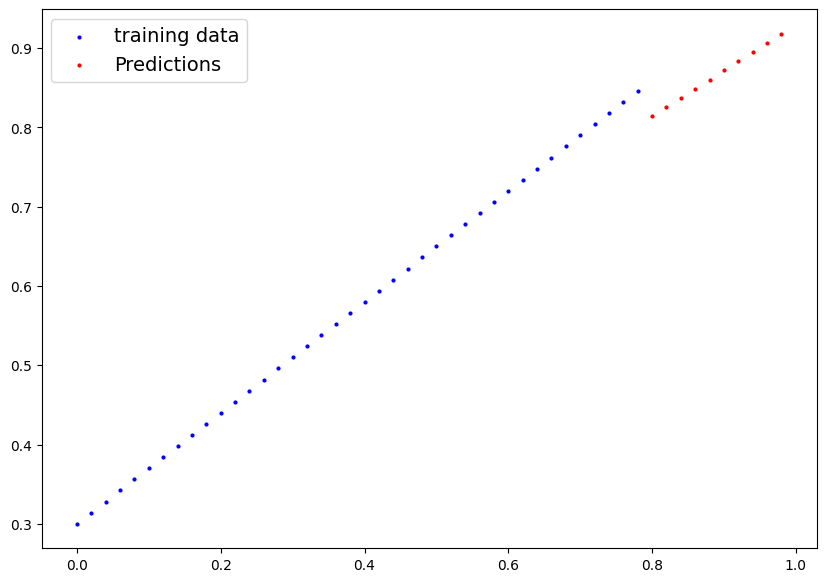

In [ ]:
plot_prediction(predictions=y_preds_new)

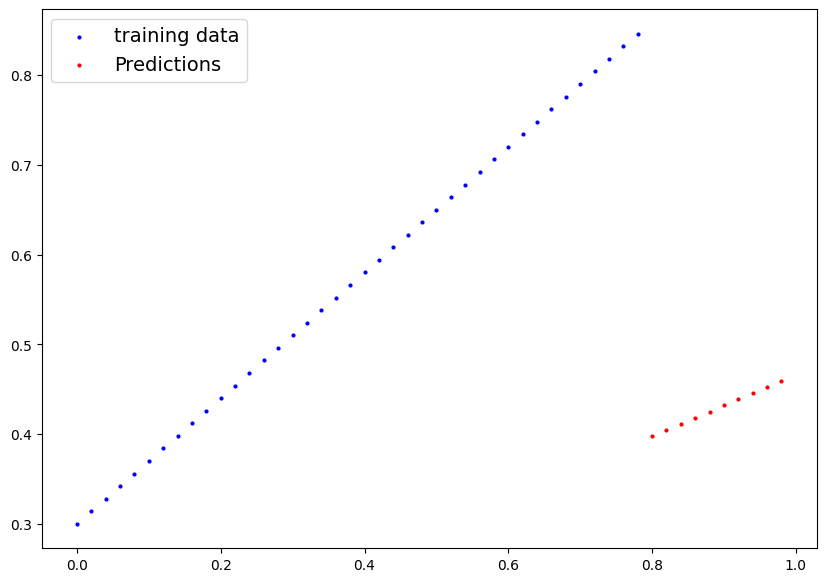

In [ ]:
plot_prediction(predictions=y_preds)

In [ ]:
import numpy as np

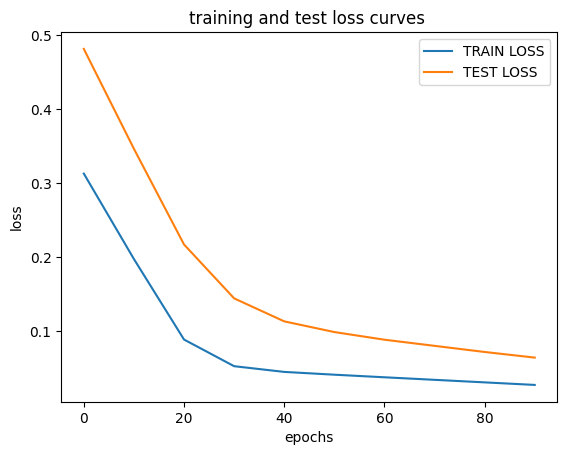

In [ ]:
#plotting the loss cureves

plt.plot(epoch_count,np.array(torch.tensor(loss_value).numpy()),label="TRAIN LOSS")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_value).numpy()),label="TEST LOSS")
plt.title("training and test loss curves ")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [ ]:
#saving the  model in pytorch
''' 1) torch.save() -- allows you to save a pytorch object in python pickle format
    2) torch.load()-- allos to load a saved pytorch on=bject
    3) torch.nn.Module.load_state_dict()--- this allows to load a model's saved state dictionary
'''


" 1) torch.save() -- allows you to save a pytorch object in python pickle format\n    2) torch.load()-- allos to load a saved pytorch on=bject\n    3) torch.nn.Module.load_state_dict()--- this allows to load a model's saved state dictionary\n"

In [ ]:
''' STATE_DICT for a model is the simple python dictionary that maps each
    layer to its paramerter tensor of learnable parameters
'''

' STATE_DICT for a model is the simple python dictionary that maps each\n    layer to its paramerter tensor of learnable parameters\n'

In [ ]:
''' SAVING AND LOADING, an example,
torch.save(model.state_dict(),PATH)

#loading

model=TheModelClass(*args,**kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''

' SAVING AND LOADING, an example,\ntorch.save(model.state_dict(),PATH)\n\n#loading\n\nmodel=TheModelClass(*args,**kwargs)\nmodel.load_state_dict(torch.load(PATH))\nmodel.eval()\n'

In [ ]:
from pathlib import Path


# creating models directory

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# create a model save path

MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


# save the model state dict

print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to :models/01_pytorch_workflow_model_1.pth


In [ ]:
# LOADING THE PYTORCH MODEL
#  1)  creating a new instance
loaded_model_1=LinearRegressionModel()

#  2) loading the saved model_1 state _dict

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#  3) put the loaded model to device

loaded_model_1.to("cpu")

LinearRegressionModel()

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])